**Part 1: Prepare your data**

You are given a large corpus of text in Turkish using special characters {‘ö’, ’ğ’, ‘ı', ‘ü’, ‘ş’, ‘ç’, ‘İ’, ‘Ö’,  ‘Ü’,  ‘Ş’,  ‘Ç’}.  You  are  expected  to  convert  these  characters  into  their  simple  English  counterparts, i.e., {‘o’, ’g’, ‘i', ‘u’, ‘s’, ‘c’, ‘I’, ‘O’, ‘U’, ‘S’, ‘C’}. This way you will have two different texts, one original and another converted.

In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding,Reshape, BatchNormalization, RepeatVector, Conv1D, Activation,MaxPooling2D, Flatten,GlobalMaxPooling1D
from tensorflow import keras

from keras import optimizers
from matplotlib import pyplot
import numpy as np
import string
from keras.models import Sequential
from keras.layers import TimeDistributed

In [2]:
#before this step, turkish-wikipedia-dump.zip uploading to drive, then dowloading from drive for google colab usage.
!pip install gdown
!gdown https://drive.google.com/uc?id=1iyhC5FJC_5-TlvMAy4ZelcyiqTsSDqQl

Downloading...
From: https://drive.google.com/uc?id=1iyhC5FJC_5-TlvMAy4ZelcyiqTsSDqQl
To: /content/turkish-wikipedia-dump.zip
158MB [00:01, 100MB/s] 


In [3]:
# used only for my test
!rm -rf wiki_00
!rm -rf englishLetters.txt
!rm -rf turkishLetters.txt

In [4]:
#turkish-wikipedia-dump.zip file unzip and getting content wiki_00 
!unzip    turkish-wikipedia-dump.zip 

Archive:  turkish-wikipedia-dump.zip
  inflating: wiki_00                 


In [5]:

!ls -la

total 606856
drwxr-xr-x 1 root root      4096 Apr  4 13:42 .
drwxr-xr-x 1 root root      4096 Apr  4 13:36 ..
drwxr-xr-x 4 root root      4096 Mar 25 13:38 .config
drwxr-xr-x 1 root root      4096 Mar 25 13:38 sample_data
-rw-r--r-- 1 root root 158383291 Apr  4 13:41 turkish-wikipedia-dump.zip
-rw-r--r-- 1 root root 463019038 Oct  2  2019 wiki_00


In [6]:
!head wiki_00

<doc id="10" url="https://tr.wikipedia.org/wiki?curid=10" title="Cengiz Han">
Cengiz Han

Cengiz Han ("Cenghis Khan", "Çinggis Haan" ya da doğum adıyla Temuçin (anlamı: demirci), Moğolca: "Чингис Хаан" ya da "Tengiz" (anlamı: deniz), ; d. 1162 – ö. 18 Ağustos 1227), Moğol komutan, hükümdar ve Moğol İmparatorluğu'nun kurucusudur. Cengiz Han, 13. Yüzyılın başında Orta Asya'daki tüm göçebe bozkır kavimlerini birleştirerek bir ulus haline getirdi ve o ulusu "Moğol" siyasi kimliği çatısı altında topladı. Dünya tarihinin en büyük askeri dehalarından biri olarak kabul edilen Cengiz Han, hükümdarlığı döneminde 1206-1227 arasında Kuzey Çin'deki Batı Xia ve Jin Hanedanı, Türkistan'daki Kara Hıtay, Maveraünnehir, Harezm, Horasan ve İran'daki Harzemşahlar ile Kafkasya'da Gürcüler, Deşt-i Kıpçak'taki Rus Knezlikleri ve Kıpçaklar ile İdil Bulgarları üzerine gerçekleştirilen seferler sonucunda Pasifik Okyanusu'ndan Hazar Denizi’ne ve Karadeniz'in kuzeyine kadar uzanan bir imparatorluk kurdu.

Bozkır 

In [7]:
#english and turkish character set which are changed by the language
turkish_alphabet=['A','a','B','b','C','c','Ç','ç','D','d','E','e','F','f','G','g','Ğ','ğ','H','h','İ','i','I','ı','J','j','K','k','L','l','M','m','N','n','O','o','Ö','ö','P','p','R','r','S','s','Ş','ş','T','t','U','u','Ü','ü','V','v','Y','y','Z','z']
turkish_ch_set=['ç','ğ','ı','ö','ş','ü','Ğ','İ','Ü','Ö','Ş','Ç']
english_ch_set=['c','g','i','o','s','u','G','I','U','O','S','C']

#englishLetters and turkishLetters files are created and prepared to fill 
turkishFile=open("turkishLetters.txt",'w',encoding='utf8')
englishFile=open("englishLetters.txt",'w',encoding='utf8')

In [8]:
#Get content from wiki_00 as line 
#First line writed to turkishFile file
#Then same line translated all turkish characters to english characters
#Then line writed to englishFile file
with open("wiki_00") as fp:
  line=fp.readline()
  while (line):
    line.strip()
    if not "doc" in line:
      for i in line:
        if i not in turkish_alphabet:
          line=line.replace(i,'')
      turkishFile.writelines(line)
      for i in range(12):
        line=line.replace(turkish_ch_set[i],english_ch_set[i])
      englishFile.writelines(line)
    line=fp.readline()

In [9]:
#english and turkish set is readed from file to englishLetters -> outputE
#                                               turkishLetters -> outputT                          
with open("turkishLetters.txt") as tf, open("englishLetters.txt") as ef:
  outputT=''
  outputE=''

  outputTestT=''
  outputTestE=''

  while (len(outputT)<200000):
    outputT += tf.read(1)
    outputE += ef.read(1)

  while (len(outputTestT)<20000):
    outputTestT += tf.read(1)
    outputTestE += ef.read(1)

print(outputE)
print(outputT)
print(outputTestE)
print(outputTestT)

CengizHanCengizHanCenghisKhanCinggisHaanyadadogumadiylaTemucinanlamidemirciMogolcayadaTengizanlamidenizdoAgustosMogolkomutanhukumdarveMogolImparatorlugununkurucusudurCengizHanYuzyilinbasindaOrtaAsyadakitumgocebebozkirkavimlerinibirlestirerekbirulushalinegetirdiveoulusuMogolsiyasikimligicatisialtindatopladiDunyatarihininenbuyukaskeridehalarindanbiriolarakkabuledilenCengizHanhukumdarligidonemindearasindaKuzeyCindekiBatiiaveJinHanedaniTurkistandakiKaraHitayMaveraunnehirHarezmHorasanveIrandakiHarzemsahlarileKafkasyadaGurculerDestiKipcaktakiRusKnezlikleriveKipcaklarileIdilBulgarlariuzerinegerceklestirilenseferlersonucundaPasifikOkyanusundanHazarDenizineveKaradenizinkuzeyinekadaruzananbirimparatorlukkurduBozkirgelenegindengelenonluteskilatikullanarakMeritokratikliykatabaglibirordumeydanagetirenCengizHaninbuyukbiraskerolarakunkazanmasinintemelindekurdugupostateskilativecasusagiileistihbaratsanatinaverdigibuyukdegeronemlibiryertutarSeferlerisonucundapekcoksehirtahripolmusvemilyonlarcainsandaka

**Result:** 'outputT'(wiki_00 orjinal dump file in contentinin ilk 200000 türkçe karakteri) ve 'outputE'(Türkçe karakterlerin İngilizce'ye çevrilmiş hali) olmak üzere iki string mevcuttur(training için kullanılacaktır).

outputTestT ve outputTestE ise test için kullanılacak verilerdir.

**Part 2: English2Turkish** 

Design a network such that you have 100 character-input and 100-binary output. The binary output predicts if characters in the  given converted text  should be converted to its Turkish counterpart. 
For example: 

        “Bu bir kisa denemedir …..” → 0000000010000000000000…..

Here, the converted text on the left has at least one character that should be changed to a Turkish character.
You should train your model by splitting the corpus into two halves, one  for training and one for testing.

In [10]:
#labeling as 001010000001 is done by comparing two strings, ouputt and outputE . (Train Y)
#same things also for test datas.  

train_label=np.zeros((len(outputE),), dtype=int)
for i, a  in enumerate(outputT):
  if outputE[i]==outputT[i]:
    train_label[i]=0
  else: 
    train_label[i]=1

test_label=np.zeros((len(outputTestE),), dtype=int)
for i, a  in enumerate(outputTestE):
  if outputTestE[i]==outputTestT[i]:
    test_label[i]=0
  else: 
    test_label[i]=1

print(train_label)
print(test_label)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [11]:
#Getting all printable ASCII characters.
#ASCII character coding for all characters in text, and scale between (0,1) range 

characters = string.printable  
token_index = dict(zip(characters, range(1, len(characters) + 1)))

train=np.zeros((len(outputE),), dtype=float)
test=np.zeros((len(outputTestE),), dtype=float)

for i, c  in enumerate(outputE):
  if(token_index.get(c)):
    train[i] = token_index.get(c)/62  #yukarıda verilen turkish_alphabet de yer alan karakterlerin maksimum değerinin 62 olduğu gözlenmiştir
                                      #bu sebeple 0 1 aralığna skale etmek için bölme işlemi yapılmıştır.
for i, c  in enumerate(outputTestE):
  if(token_index.get(c)):
    test[i] = token_index.get(c)/62

print(train)
print(test)
#reshape arrays TrainX TrainY and TestX TestY
TrainX=train.reshape(2000,100)
TestX=test.reshape(200,100)
TrainY=train_label.reshape(2000,100)
TestY=test_label.reshape(200,100)

[0.62903226 0.24193548 0.38709677 ... 0.40322581 0.4516129  0.48387097]
[0.17741935 0.56451613 0.17741935 ... 0.79032258 0.24193548 0.37096774]


In [12]:
#define first model architecture 
#        LSTM used
def define_model(in_timesteps,out_timesteps):
      model = Sequential()
      model.add(Embedding(2000, 256, input_length=in_timesteps, mask_zero=True))
      model.add(BatchNormalization())
      model.add(LSTM(256))
      #model.add(Dense(128, activation='softmax'))
      model.add(RepeatVector(out_timesteps))
      model.add(LSTM(256, return_sequences=True))
      model.add(BatchNormalization())
      model.add(TimeDistributed(Dense(units=100)))
      return model

In [13]:
#create model and compile
#  RMSProp + sparse_categorical_crossentropy used
model = define_model(100, 100)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 256)          512000    
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 256)          1024      
_________________________________________________________________
lstm (LSTM)                  (None, 256)               525312    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 100, 256)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 256)          1024      
_________________________________________________________________
time_distributed (TimeDistri (None, 100, 100)          2

In [15]:
history = model.fit(TrainX,TrainY.reshape(TrainY.shape[0], TrainY.shape[1], 1), epochs=30, batch_size=256, validation_data=(TestX,TestY.reshape(TestY.shape[0], TestY.shape[1], 1)), verbose=1)

Epoch 1/30
8/8 [==============================] - 48s 5s/step - loss: 6.2220 - accuracy: 0.4211 - val_loss: 0.7625 - val_accuracy: 0.8796
Epoch 2/30
8/8 [==============================] - 36s 4s/step - loss: 2.0674 - accuracy: 0.8024 - val_loss: 0.9813 - val_accuracy: 0.8796
Epoch 3/30
8/8 [==============================] - 35s 4s/step - loss: 2.2614 - accuracy: 0.7045 - val_loss: 0.4879 - val_accuracy: 0.8796
Epoch 4/30
8/8 [==============================] - 35s 4s/step - loss: 2.0045 - accuracy: 0.8391 - val_loss: 0.5261 - val_accuracy: 0.8796
Epoch 5/30
8/8 [==============================] - 35s 4s/step - loss: 1.2737 - accuracy: 0.8513 - val_loss: 0.6969 - val_accuracy: 0.8796
Epoch 6/30
8/8 [==============================] - 35s 4s/step - loss: 1.2544 - accuracy: 0.8520 - val_loss: 1.9088 - val_accuracy: 0.8796
Epoch 7/30
8/8 [==============================] - 35s 4s/step - loss: 4.7875 - accuracy: 0.6589 - val_loss: 1.6314 - val_accuracy: 0.8796
Epoch 8/30
8/8 [==================

In [18]:
#define second model architecture
#       LSTM and Fully Connected layer used.
model2 = Sequential()
model2.add(Embedding(100, 256, input_length=100, mask_zero=True))
model2.add(BatchNormalization())
model2.add(LSTM(256))
model2.add(RepeatVector(100))
model2.add(LSTM(256, return_sequences=True))
model2.add(Dense(100, activation='softmax'))

# Adam + sparse_categorical_crossentropy used
rms = optimizers.Adam(lr=0.01)
model2.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 256)          25600     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100, 256)          1024      
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 100, 256)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 256)          525312    
_________________________________________________________________
dense_1 (Dense)              (None, 100, 100)          25700     
Total params: 1,102,948
Trainable params: 1,102,436
Non-trainable params: 512
__________________________________________

In [19]:
history2 = model2.fit(TrainX,TrainY.reshape(TrainY.shape[0], TrainY.shape[1], 1), epochs=20, batch_size=256, validation_data=(TestX,TestY.reshape(TestY.shape[0], TestY.shape[1], 1)), verbose=1)

Epoch 1/20
8/8 [==============================] - 42s 5s/step - loss: 2.8357 - accuracy: 0.5221 - val_loss: 0.7980 - val_accuracy: 0.8796
Epoch 2/20
8/8 [==============================] - 34s 4s/step - loss: 0.5616 - accuracy: 0.8911 - val_loss: 0.4470 - val_accuracy: 0.8796
Epoch 3/20
8/8 [==============================] - 35s 4s/step - loss: 0.3856 - accuracy: 0.8893 - val_loss: 0.4152 - val_accuracy: 0.8796
Epoch 4/20
8/8 [==============================] - 35s 4s/step - loss: 0.3754 - accuracy: 0.8892 - val_loss: 0.3809 - val_accuracy: 0.8796
Epoch 5/20
8/8 [==============================] - 34s 4s/step - loss: 0.3555 - accuracy: 0.8907 - val_loss: 0.3787 - val_accuracy: 0.8796
Epoch 6/20
8/8 [==============================] - 34s 4s/step - loss: 0.3509 - accuracy: 0.8904 - val_loss: 0.3692 - val_accuracy: 0.8796
Epoch 7/20
8/8 [==============================] - 34s 4s/step - loss: 0.3477 - accuracy: 0.8905 - val_loss: 0.3713 - val_accuracy: 0.8796
Epoch 8/20
8/8 [==================

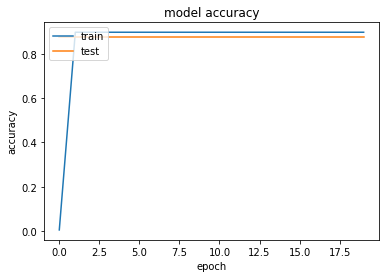

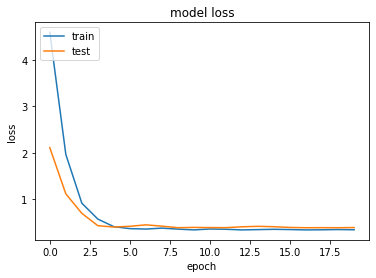

In [ ]:
# summarize history2 for accuracy
pyplot.plot(history2.history['acc'])
pyplot.plot(history2.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
# summarize history for loss
pyplot.plot(history2.history['loss'])
pyplot.plot(history2.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

In [ ]:

def build_model_3():
  model = Sequential([
    Embedding(2000,100, input_length=100),
    
    Conv1D(filters=128, kernel_size=11, strides=5, padding='valid'),
    GlobalMaxPooling1D(),
    BatchNormalization(),
    
    Dense(512, activation='sigmoid'),
    BatchNormalization(),
    Dense(256, activation='sigmoid'),
    Dense(100)
  ])
# binary_crossentropy + SGD used
  optimizer =optimizers.SGD(lr=0.002)
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

model3 = build_model_3()
model3.summary()
history3 = model3.fit(TrainX,TrainY, epochs=30, batch_size=64, validation_data=(TestX,TestY))

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_54 (Embedding)     (None, 100, 100)          200000    
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 18, 128)           140928    
_________________________________________________________________
global_max_pooling1d_48 (Glo (None, 128)               0         
_________________________________________________________________
batch_normalization_93 (Batc (None, 128)               512       
_________________________________________________________________
dense_148 (Dense)            (None, 512)               66048     
_________________________________________________________________
batch_normalization_94 (Batc (None, 512)               2048      
_________________________________________________________________
dense_149 (Dense)            (None, 256)             

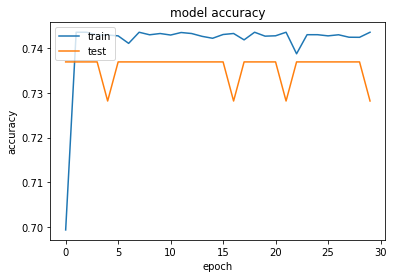

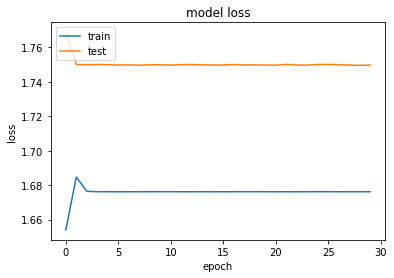

In [ ]:
# summarize history2 for accuracy
pyplot.plot(history3.history['acc'])
pyplot.plot(history3.history['val_acc'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()
# summarize history for loss
pyplot.plot(history3.history['loss'])
pyplot.plot(history3.history['val_loss'])
pyplot.title('model loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()